#Tutorial for Simple Linear Regression

In [6]:
%matplotlib inline

In [1]:
import numpy as np
import pandas as pd
import quandl
quandl.ApiConfig.api_key = 'My Quandl API'

In [2]:
#get data from quandl
spy_table = quandl.get('BCIW/_SPXT')
amzn_table = quandl.get('WIKI/AMZN')

#fetch data from Jan 2017 to Jun 2017
spy = spy_table.loc['2017':'2017-6',['Close']]
amzn = amzn_table.loc['2017':'2017-6',['Close']]

#calculate log return
spy_log = np.log(spy.Close).diff().dropna()
amzn_log = np.log(amzn.Close).diff().dropna()
df = pd.concat([spy_log,amzn_log],axis = 1).dropna()
df.columns = ['spy','amzn']

In [3]:
df.tail()

,spy,amzn
Date,,
2017-01-25,0.007995,0.016975
2017-01-26,-0.000714,0.003139
2017-01-27,-0.000815,-0.004036
2017-01-30,-0.005982,-0.006470
2017-01-31,-0.000885,-0.008344


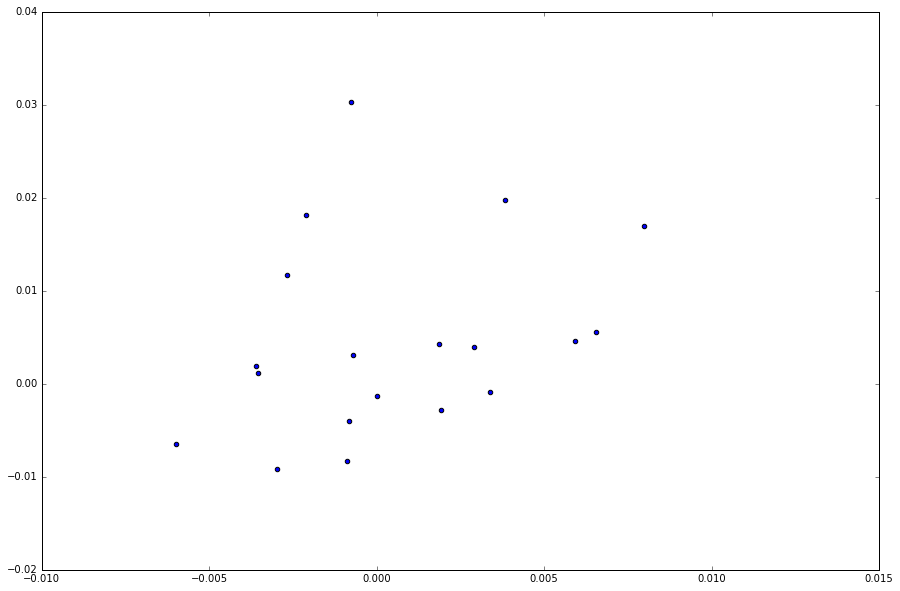

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15,10))
plt.scatter(df.spy,df.amzn)
plt.show()

In [8]:
import statsmodels.formula.api as sm
model = sm.ols(formula = 'amzn~spy',data = df).fit()
model.summary()

/usr/local/lib/python3.4/dist-packages/scipy-1.0.1-py3.4-linux-x86_64.egg/scipy/stats/stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   amzn   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     1.557
Date:                Tue, 08 May 2018   Prob (F-statistic):              0.229
Time:                        05:08:02   Log-Likelihood:                 61.032
No. Observations:                  19   AIC:                            -118.1
Df Residuals:                      17   BIC:                            -116.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0042      0.002      1.772      0.094      -0.001       0.009
spy            0.7935      0.636      1.248      0.229      -0.548       2.135
==============================================================================
Omnibus:                        7.367   Durbin-Watson:                   1.638
Prob(Omnibus):                  0.025   Jarque-Bera (JB):                4.871
Skew:                           1.178   Prob(JB):                       0.0876
Kurtosis:                       3.777   Cond. No.                         269.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

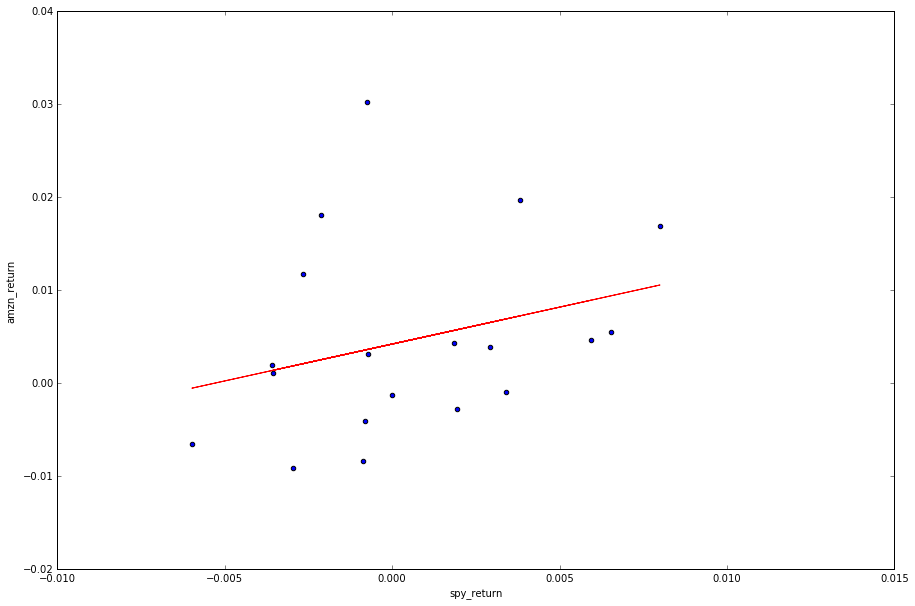

In [9]:
plt.figure(figsize = (15,10))
plt.scatter(df.spy,df.amzn)
plt.xlabel('spy_return')
plt.ylabel('amzn_return')
plt.plot(df.spy,model.predict(),color = 'red')
plt.show()